<a href="https://colab.research.google.com/github/GaneshKGowda25/Salary_prediction-using-sklearn-/blob/main/Salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PREDICTING THE 'SALARY' BASED ON 'EXPERIENCE' USING LINEAR REGRESSION.

#Importing all the required libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded=files.upload()

Saving Salary_dataset.csv to Salary_dataset (1).csv


##Loading the dataset.

In [ ]:
df=pd.read_csv("Salary_dataset.csv")

##Changing column names and enquiring dataset.

In [ ]:
##changingcolumn names and enquiring dataset
cols=['unnamed', 'experience_in_years', 'salary']
df.columns=cols
df.head()

,unnamed,experience_in_years,salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


#Checking for nan values and visualising the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unnamed              30 non-null     int64  
 1   experience_in_years  30 non-null     float64
 2   salary               30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes
None
----------------------------------------------------
unnamed                0
experience_in_years    0
salary                 0
dtype: int64
----------------------------------------------------


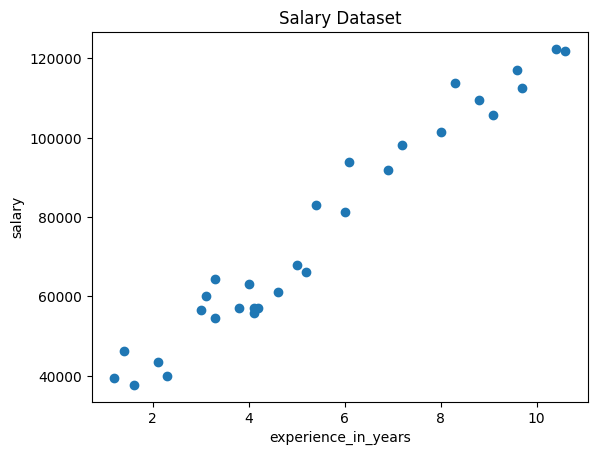

In [ ]:
print(df.info())
print('----------------------------------------------------')
print(df.isna().sum())
print('----------------------------------------------------')
plt.scatter(df['experience_in_years'],df['salary'])
plt.title("Salary Dataset")
plt.xlabel('experience_in_years')
plt.ylabel('salary')
plt.show()

## Importing sklearn libraries and storing columns in as array.

In [ ]:
from sklearn.model_selection import train_test_split
X=df[['experience_in_years']]
y=df['salary']

##Splitting data for test and train.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

##Training the model.

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

model.fit(X_train,y_train)

print('Weight=',model.coef_[0])
print('Bias=',model.intercept_)

Weight= 9423.815323030976
Bias= 24380.201479473704


#Predicting the output.

In [ ]:
y_pred=model.predict(X_test)

#Prinnting 'Expected output' and 'Predicted output'.

In [ ]:
x_test_array=np.array(X_test).flatten()

print("Expected output: ")
print(pd.DataFrame({'experience_in_years':x_test_array,

                    'salary':y_test}))
print('-------------------------------------------------------------')
print("Predicted output: ")
print(pd.DataFrame({'experience_in_years':x_test_array,
                    'salary':y_pred}))

Expected output: 
    experience_in_years    salary
27                  9.7  112636.0
15                  5.0   67939.0
23                  8.3  113813.0
17                  5.4   83089.0
8                   3.3   64446.0
9                   3.8   57190.0
-------------------------------------------------------------
Predicted output: 
   experience_in_years         salary
0                  9.7  115791.210113
1                  5.0   71499.278095
2                  8.3  102597.868661
3                  5.4   75268.804224
4                  3.3   55478.792045
5                  3.8   60190.699707


#Visualizing expected vs predicted output.

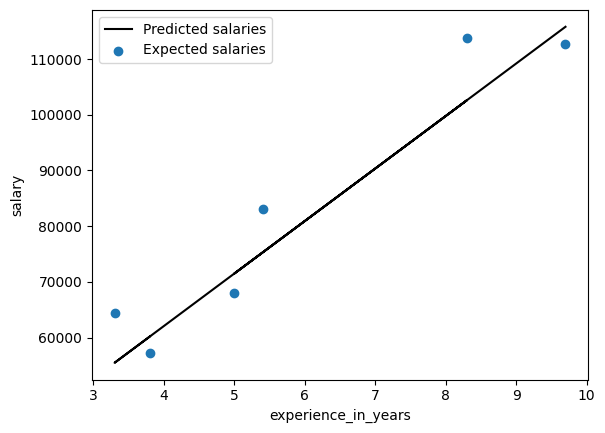

In [ ]:
plt.plot(X_test,y_pred,label='Predicted salaries',color='black')
plt.scatter(X_test,y_test,label='Expected salaries')
plt.legend()
plt.xlabel('experience_in_years')
plt.ylabel('salary')
plt.show()

#Visualzing the Model.

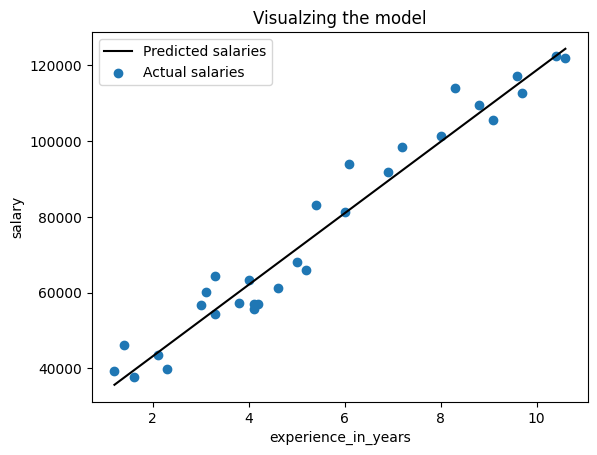

In [ ]:
plt.plot(X,model.predict(X),color='black',label='Predicted salaries')
plt.scatter(X,y,label='Actual salaries')
plt.legend()
plt.title('Visualzing the model')
plt.xlabel('experience_in_years')
plt.ylabel('salary')
plt.show()

#Evaluating the model.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse=mean_squared_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)
print("MSE=",mse)
print("R^2 score=",r2_score)

MSE= 49830096.855908394
R^2 score= 0.9024461774180497


#Testing with random value.

In [ ]:
experience = np.array(float(input("Enter the experience in years: "))).reshape(-1, 1)
prediction=model.predict(experience)
print("Expected salary=",prediction[0])

Enter the experience in years: 13
Expected salary= 146889.8006788764


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
